<p style="text-align: center;"><img src="https://lms.techproeducation.com/pluginfile.php/1/theme_edumy/headerlogo2/1663129929/logo.png" class="img-fluid" alt="CLRSWY"></p>

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
# import pyforest
# import plotly
# import cufflinks as cf
# #Enabling the offline mode for interactive plotting locally
# from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
# init_notebook_mode(connected=True)
# cf.go_offline()
# #To display the plots
# %matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score, cross_validate
# from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
# from sklearn.metrics import make_scorer
# from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import roc_curve, auc
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', 1000)
# pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Oct 14 13:00:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0    42W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_male = pd.read_csv('ANSUR II MALE Public.csv' , encoding='latin-1')
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [6]:
df_female = pd.read_csv('ANSUR II FEMALE Public.csv' , encoding='latin-1')
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [7]:
df_male.shape

(4082, 108)

In [8]:
df_female.shape

(1986, 108)

In [9]:
df_male.drop('subjectid' , axis = 1 , inplace = True)
df_female.drop('SubjectId' , axis = 1 , inplace = True)

In [10]:
df = pd.concat([df_male , df_female] , axis = 0)

In [11]:
df.shape

(6068, 107)

In [12]:
dropped = ['SubjectNumericRace', 'Ethnicity', 'Heightin', 'Weightlbs', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS']

In [13]:
df.drop(dropped , axis = 1 ,inplace = True)

In [14]:
df.shape

(6068, 98)

In [15]:
df.isna().sum().sum()

0

In [16]:
df.reset_index(inplace = True , drop=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  6068 non-null   int64 
 1   acromialheight                  6068 non-null   int64 
 2   acromionradialelength           6068 non-null   int64 
 3   anklecircumference              6068 non-null   int64 
 4   axillaheight                    6068 non-null   int64 
 5   balloffootcircumference         6068 non-null   int64 
 6   balloffootlength                6068 non-null   int64 
 7   biacromialbreadth               6068 non-null   int64 
 8   bicepscircumferenceflexed       6068 non-null   int64 
 9   bicristalbreadth                6068 non-null   int64 
 10  bideltoidbreadth                6068 non-null   int64 
 11  bimalleolarbreadth              6068 non-null   int64 
 12  bitragionchinarc                6068 non-null   

In [18]:
df.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace,Age
count,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,...,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000
mean,246.468688,1406.161338,327.374423,224.891397,1299.608767,244.19265,194.754614,399.204186,340.934245,274.735003,...,317.750000,914.501483,229.674028,377.003790,1031.501154,797.093935,169.002966,830.059987,1.615030,29.761206
std,37.400106,79.091048,20.720018,16.051833,72.022286,16.84502,13.516368,30.236914,41.519866,19.221034,...,36.363125,114.274513,35.613193,31.617723,62.702388,156.528164,13.124513,47.650519,0.979156,8.674650
min,155.000000,1115.000000,249.000000,156.000000,1038.000000,186.00000,151.000000,283.000000,216.000000,197.000000,...,211.000000,611.000000,138.000000,289.000000,805.000000,358.000000,124.000000,672.000000,1.000000,17.000000
25%,219.000000,1350.000000,313.000000,214.000000,1249.000000,232.00000,185.000000,376.000000,311.000000,262.000000,...,292.000000,829.000000,203.000000,355.000000,988.000000,682.000000,159.000000,797.000000,1.000000,23.000000
50%,242.000000,1410.000000,328.000000,225.000000,1302.000000,245.00000,195.000000,404.000000,341.000000,274.000000,...,316.000000,907.000000,226.000000,375.000000,1033.000000,785.000000,170.000000,830.000000,1.000000,28.000000
75%,271.000000,1462.000000,341.250000,235.000000,1349.000000,256.00000,204.000000,421.000000,370.000000,288.000000,...,343.000000,992.000000,252.250000,398.000000,1076.000000,896.000000,179.000000,863.000000,2.000000,36.000000
max,451.000000,1683.000000,393.000000,293.000000,1553.000000,306.00000,245.000000,489.000000,490.000000,362.000000,...,461.000000,1379.000000,406.000000,494.000000,1245.000000,1442.000000,216.000000,1009.000000,8.000000,58.000000


In [19]:
# for col in df.describe() :
#     if df.describe()[col]['std'] > df.describe()[col]['mean'] : 
#         print(col)

In [20]:
# for col in df.columns : 
#     if df[col].dtype != 'object':
#         fig = plt.figure()
#         sns.boxplot(data = df , y = df[col] , whis=3)

In [21]:
# def remove_outlier(df, col):
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1 
#     low_limit  = q1-1.5*iqr
#     high_limit = q3+1.5*iqr
#     df = df.loc[(df[col] > low_limit) & (df[col] < high_limit)]
#     return df

In [22]:
# for col in df.columns : 
#     remove_outlier(df,col)

In [23]:
# remove_outlier(df , 'abdominalextensiondepthsitting')

In [24]:
df.drop(df[df['DODRace'] > 3].index , axis = 0 , inplace = True)

In [25]:
df.shape

(5769, 98)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [26]:
X = df.drop('DODRace' , axis = 1)
y = df['DODRace']

In [27]:
X.select_dtypes('object')

,Gender,SubjectsBirthLocation,WritingPreference
0,Male,North Dakota,Right hand
1,Male,New York,Left hand
2,Male,New York,Left hand
3,Male,Wisconsin,Right hand
4,Male,North Carolina,Right hand
...,...,...,...
6063,Female,Texas,Right hand
6064,Female,Texas,Right hand
6065,Female,Texas,Right hand
6066,Female,Texas,Right hand


In [28]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
enc = OrdinalEncoder()

In [30]:
X = enc.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.15 , random_state = 53)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Scale always better.

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

Vanilla modelin anlami; default degerler ile model kurulmasidir.

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_model = LogisticRegression(class_weight = 'balanced' , random_state = 53)

In [39]:
log_model.fit(X_train_scaled , y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(class_weight='balanced', random_state=53)

In [40]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [41]:
y_train_pred = log_model.predict(X_train_scaled)
y_pred = log_model.predict(X_test_scaled)

In [42]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print()
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [43]:
eval_metric(log_model , X_train_scaled , y_train , X_test_scaled , y_test)

Test_Set
[[443  12  97]
 [ 10 182  12]
 [ 25  17  68]]
              precision    recall  f1-score   support

           1       0.93      0.80      0.86       552
           2       0.86      0.89      0.88       204
           3       0.38      0.62      0.47       110

    accuracy                           0.80       866
   macro avg       0.72      0.77      0.74       866
weighted avg       0.84      0.80      0.82       866


Train_Set
[[2586   63  591]
 [  25 1008   61]
 [ 106   38  425]]
              precision    recall  f1-score   support

           1       0.95      0.80      0.87      3240
           2       0.91      0.92      0.92      1094
           3       0.39      0.75      0.52       569

    accuracy                           0.82      4903
   macro avg       0.75      0.82      0.77      4903
weighted avg       0.88      0.82      0.84      4903



In [44]:
# from sklearn.metrics import roc_auc_score , precision_recall_curve , plot_roc_curve , plot_precision_recall_curve # sklearn

In [45]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_validate

In [46]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

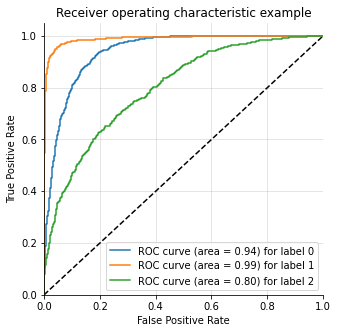

In [47]:
plot_multiclass_roc(log_model , X_train_scaled , y_train , 3 )

In [48]:
log_train_scores = cross_validate(log_model , X_train_scaled , y_train , scoring = 'accuracy' , cv = 5 )
log_test_scores = cross_validate(log_model , X_test_scaled , y_test , scoring = 'accuracy' , cv = 5 )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [49]:
log_train_scores = pd.DataFrame(log_train_scores)

In [50]:
scores = pd.DataFrame(log_train_scores.mean()[2:] , columns = ['log_train'])

In [51]:
scores

,log_train
test_score,0.800121


In [52]:
log_test_scores = pd.DataFrame(log_test_scores)

In [53]:
scores = pd.concat([scores,pd.DataFrame(log_test_scores.mean()[2:] , columns = ['log_test'])] , axis = 1)

In [54]:
scores

,log_train,log_test
test_score,0.800121,0.782892


### Logistic Model GridsearchCV

## Lojistic Regression solver "liblinear" for small dataset

__liblenear__ kucuk datasetlerinde iyi sonuclar verir. Dikkat edilmesi gereken husus; liblinear sadece __penalty="l1"__ ile calisir, yoksa hata verir.

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
log_grid_model = LogisticRegression(random_state=53 , solver = 'liblinear' , penalty='l1' , class_weight='balanced' , max_iter=5000)

In [57]:
param_grid = {'C' : np.linspace(0.20 , 0.35 , 30)}

In [58]:
log_grid_model = GridSearchCV(log_grid_model , param_grid=param_grid , cv=5 , scoring='accuracy' , verbose=2)

In [59]:
log_grid_model.fit(X_train_scaled , y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, penalty='l1',
                                          random_state=53, solver='liblinear'),
             param_grid={'C': array([0.2       , 0.20517241, 0.21034483, 0.21551724, 0.22068966,
       0.22586207, 0.23103448, 0.2362069 , 0.24137931, 0.24655172,
       0.25172414, 0.25689655, 0.26206897, 0.26724138, 0.27241379,
       0.27758621, 0.28275862, 0.28793103, 0.29310345, 0.29827586,
       0.30344828, 0.30862069, 0.3137931 , 0.31896552, 0.32413793,
       0.32931034, 0.33448276, 0.33965517, 0.34482759, 0.35      ])},
             scoring='accuracy', verbose=-1)

In [60]:
# import tensorflow as tf
# tf.test.gpu_device_name()

In [61]:
# C , penalty , l1_ratio , solver , max_iter , multi_class , class_weight 

In [60]:
log_grid_model.best_params_

{'C': 0.2413793103448276}

In [61]:
log_grid_model.best_score_

0.872524704071231

In [62]:
y_train_pred = log_grid_model.predict(X_train_scaled)
y_pred = log_grid_model.predict(X_test_scaled)

In [63]:
eval_metric(log_grid_model , X_train , y_train , X_test , y_test)

Test_Set
[[430  24  98]
 [ 10 182  12]
 [ 40  26  44]]
              precision    recall  f1-score   support

           1       0.90      0.78      0.83       552
           2       0.78      0.89      0.83       204
           3       0.29      0.40      0.33       110

    accuracy                           0.76       866
   macro avg       0.66      0.69      0.67       866
weighted avg       0.79      0.76      0.77       866


Train_Set
[[2577  162  501]
 [  64  948   82]
 [ 211   88  270]]
              precision    recall  f1-score   support

           1       0.90      0.80      0.85      3240
           2       0.79      0.87      0.83      1094
           3       0.32      0.47      0.38       569

    accuracy                           0.77      4903
   macro avg       0.67      0.71      0.68      4903
weighted avg       0.81      0.77      0.79      4903



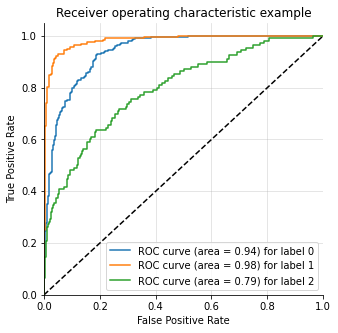

In [64]:
plot_multiclass_roc(log_grid_model,X_test_scaled,y_test,3)

In [65]:
log_grid_model.best_score_

0.872524704071231

In [66]:
pd.DataFrame({'log_grid_train' : [log_grid_model.best_score_] } , index = ['test_score']);

In [67]:
scores = pd.concat([scores , pd.DataFrame({'log_grid_train' : [log_grid_model.best_score_] } , index = ['test_score'])] , axis = 1)

In [68]:
scores

,log_train,log_test,log_grid_train
test_score,0.800121,0.782892,0.872525


In [69]:
log_grid_model = LogisticRegression(random_state=53 , solver = 'liblinear' , penalty='l1' ,
                                    C = 0.32 , class_weight='balanced' , max_iter=5000)

In [70]:
scores

,log_train,log_test,log_grid_train
test_score,0.800121,0.782892,0.872525


In [74]:
log_grid_test = pd.DataFrame(cross_validate(log_grid_model , X_test_scaled , y_test , scoring = 'accuracy' , cv = 5)).mean()[2:]

In [75]:
log_grid_test

test_score    0.807142
dtype: float64

In [80]:
log_grid_test = pd.DataFrame({'log_grid_test' : log_grid_test} , index = ['test_score'])

In [81]:
log_grid_test

,log_grid_test
test_score,0.807142


In [83]:
scores = pd.concat([scores,log_grid_test] , axis = 1)

In [84]:
scores

,log_train,log_test,log_grid_train,log_grid_test
test_score,0.800121,0.782892,0.872525,0.807142


## 2. SVC

### Vanilla SVC model 

Vanilla modellerde default degerler verilmeli ama dengesiz bir datasetimiz oldugu icin  class_weight düşünülmeli

In [85]:
from sklearn.svm import SVC

In [86]:
svc = SVC(random_state = 53 , class_weight='balanced')

In [87]:
svc.fit(X_train_scaled , y_train)

SVC(class_weight='balanced', random_state=53)

In [88]:
y_train_pred = svc.predict(X_train_scaled)
y_pred = svc.predict(X_test_scaled)

In [89]:
eval_metric(svc,X_train_scaled, y_train , X_test_scaled , y_test)

Test_Set
[[462   9  81]
 [ 10 183  11]
 [ 30  18  62]]
              precision    recall  f1-score   support

           1       0.92      0.84      0.88       552
           2       0.87      0.90      0.88       204
           3       0.40      0.56      0.47       110

    accuracy                           0.82       866
   macro avg       0.73      0.77      0.74       866
weighted avg       0.84      0.82      0.83       866


Train_Set
[[2801   44  395]
 [  25 1035   34]
 [  68   22  479]]
              precision    recall  f1-score   support

           1       0.97      0.86      0.91      3240
           2       0.94      0.95      0.94      1094
           3       0.53      0.84      0.65       569

    accuracy                           0.88      4903
   macro avg       0.81      0.88      0.83      4903
weighted avg       0.91      0.88      0.89      4903



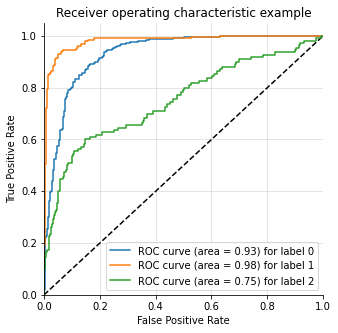

In [90]:
plot_multiclass_roc(svc,X_test_scaled,y_test,3)

In [97]:
svc_train = pd.DataFrame(cross_validate(svc,X_train_scaled , y_train , cv = 5 , scoring = 'accuracy' )).mean()[2:]

In [98]:
svc_train

test_score    0.725882
dtype: float64

In [100]:
svc_train = pd.DataFrame({'svc_train' : svc_train } , index = ['test_score'])

In [102]:
scores = pd.concat([scores,svc_train] , axis = 1)

In [103]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train
test_score,0.800121,0.782892,0.872525,0.807142,0.725882


In [122]:
svc_test = pd.DataFrame(cross_validate(svc,X_test_scaled , y_test , cv = 5 , scoring = 'accuracy' )).mean()[2:]

In [123]:
svc_test

test_score    0.795588
dtype: float64

In [125]:
svc_test = pd.DataFrame({'svc_test' : svc_test} , index = ['test_score'])

In [126]:
scores = pd.concat([scores,svc_test] , axis = 1)

In [127]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train,svc_test
test_score,0.800121,0.782892,0.872525,0.807142,0.725882,0.795588


###  SVC Model GridsearchCV

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
grid_svc_model = SVC(random_state = 53 , class_weight = 'balanced' )

In [106]:
# C , kernel , degree , gamma , 

In [114]:
param_grid = {'C' : [0.5,0.75,1,3,7,10] , 'kernel' : ['linear','poly','rbf'] , 'degree' : [2,3,4] , 'gamma' : ['scale','auto']}

In [115]:
grid_svc_model = GridSearchCV(grid_svc_model , param_grid=param_grid , cv=5 , n_jobs = -1,  verbose = 2 , scoring='accuracy' )

In [116]:
grid_svc_model.fit(X_train_scaled , y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=SVC(C=1, class_weight='balanced', degree=2,
                           random_state=53),
             n_jobs=-1,
             param_grid={'C': [0.5, 0.75, 1, 3, 7, 10], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy', verbose=2)

In [110]:
grid_svc_model.best_params_

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [111]:
eval_metric(grid_svc_model,X_train_scaled, y_train , X_test_scaled , y_test)

Test_Set
[[462   9  81]
 [ 10 183  11]
 [ 30  18  62]]
              precision    recall  f1-score   support

           1       0.92      0.84      0.88       552
           2       0.87      0.90      0.88       204
           3       0.40      0.56      0.47       110

    accuracy                           0.82       866
   macro avg       0.73      0.77      0.74       866
weighted avg       0.84      0.82      0.83       866


Train_Set
[[2801   44  395]
 [  25 1035   34]
 [  68   22  479]]
              precision    recall  f1-score   support

           1       0.97      0.86      0.91      3240
           2       0.94      0.95      0.94      1094
           3       0.53      0.84      0.65       569

    accuracy                           0.88      4903
   macro avg       0.81      0.88      0.83      4903
weighted avg       0.91      0.88      0.89      4903



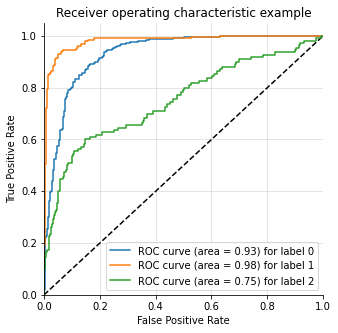

In [112]:
plot_multiclass_roc(grid_svc_model,X_test_scaled,y_test,3)

In [117]:
svc_grid_model = SVC(random_state = 53 , class_weight = 'balanced' , C = 1 , kernel = 'rbf', degree = 2 , gamma = 'scale' )

In [120]:
svc_grid_train = pd.DataFrame(cross_validate(svc_grid_model , X_train_scaled , y_train , scoring = 'accuracy' , cv = 5)).mean()[2:]

In [131]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train,svc_test
test_score,0.800121,0.782892,0.872525,0.807142,0.725882,0.795588


In [130]:
svc_grid_train

test_score    0.817461
dtype: float64

In [135]:
svc_grid_train = pd.DataFrame({'svc_grid_train' : svc_grid_train} , index = ['test_score'])

In [137]:
scores = pd.concat([scores,svc_grid_train] , axis = 1)

In [138]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train,svc_test,svc_grid_train
test_score,0.800121,0.782892,0.872525,0.807142,0.725882,0.795588,0.817461


In [140]:
svc_grid_test = pd.DataFrame(cross_validate(svc_grid_model , X_test_scaled , y_test , scoring = 'accuracy' , cv = 5)).mean()[2:]

In [146]:
svc_grid_test

test_score    0.795588
dtype: float64

In [148]:
svc_grid_test = pd.DataFrame({'svc_grid_test' : svc_grid_test} , index = ['test_score'])

In [151]:
scores = pd.concat([scores,svc_grid_test] , axis = 1)

In [152]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train,svc_test,svc_grid_train,svc_grid_test
test_score,0.800121,0.782892,0.872525,0.807142,0.725882,0.795588,0.817461,0.795588


## 3. RF

### Vanilla RF Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state = 53 , class_weight = 'balanced' )

In [ ]:
rf.fit(X_train , y_train)

In [ ]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [ ]:
eval_metric(rf,X_train , y_train , X_test , y_test)

In [ ]:
# plot_multiclass_roc(rf,X_test,y_test,3)

### RF Model GridsearchCV

In [ ]:
rf_grid = RandomForestClassifier(random_state = 53 , class_weight = 'balanced' )

In [ ]:
# n_estimator , criterion , max_depth , max_features , max_samples

In [ ]:
param_grid = {'n_estimators' : [50,80,100,150,300] , 'splitter' : ['best' , 'random'] , 'criterion' : ['gini','entrophy'] , 'max_depth' : [3,5,10,20] ,
                               'max_features' : ['auto','sqrt','log2',None] , 'max_samples' : [None,0.8,0.5]  }

In [ ]:
rf_grid = GridSearchCV(rf_grid , param_grid = param_grid ,scoring = 'accuracy' ,  cv = 5 , verbose = 2 , n_jobs = -1 )

In [ ]:
rf_grid.fit(X_train , y_train)

In [ ]:
rf_grid.get_params().keys()

## 4. XGBoost

### Vanilla XGBoost Model

### XGBoost Model GridsearchCV

## Comparing Models

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

## Altta yazılı olan başlıklar ile ilgili domain knowledge yapılarak çözüme gelinmeli

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Yukaridaki makale Smote islemini detayli bir sekilde anlatiyor. 

##  Smote implement

__Smote__ -----> Dengesiz data setlerinde datadaki en buyuk gozlem sayisi hangi class' a ait ise diger class' larin gozlem sayisini da ona esitler. Mesela datamizdaki en buyuk gozlem sayisi White = 3034 idi. Smote islemi uygulandiginda diger class' lardaki gozlem sayilari da buna esitlenir. Dengesiz datasetlerinde mutlaka denenmelidir :

## Logistic Regression Over/Under Sampling

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

## Shap values for all data

## SMOTE for X3 dataset

## Find the best threshold for multiclassification

<p style="text-align: center;"><img src="https://lms.techproeducation.com/pluginfile.php/1/theme_edumy/headerlogo2/1663129929/logo.png" class="img-fluid" alt="CLRSWY"></p>